In [1]:
%matplotlib notebook

In [61]:
# Import Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [5]:
#Weather_Data_NCDC.csv
# Import the CSV
tempx_data = pd.read_csv("Data/Weather_Data_NCDC.csv")
tempx_data.head()


,Location ID,Location,Date (Year Month),Value in F,Rank,1901-2000 Mean in F,Anomaly (1901-2000 base period)
0,100,Alabama,189501,43.1,40,45.1,-2.0
1,100,Alabama,189502,37.4,1,48.0,-10.6
2,100,Alabama,189503,54.5,55,55.1,-0.6
3,100,Alabama,189504,63.4,73,62.8,0.6
4,100,Alabama,189505,69.5,37,70.7,-1.2


In [23]:
# build df for only 2010 months January to December
tempx_2010 = tempx_data[(tempx_data['Date (Year Month)'] >=201001) & (tempx_data['Date (Year Month)'] <=201012)]
tempx_2010
tempx_2010=tempx_2010.rename(columns={"Location": "CHSI_State_Name"})

In [38]:
#Group by State to identify count of obese counties by state
tempgrx_2010 = tempx_2010.groupby("CHSI_State_Name").mean()
tempgrx_2010.head()

,Location ID,Date (Year Month),Value in F,Rank,1901-2000 Mean in F,Anomaly (1901-2000 base period)
CHSI_State_Name,,,,,,
Alabama,100.0,201006.5,62.708333,72.083333,63.075000,-0.366667
Arizona,200.0,201006.5,60.391667,75.750000,59.350000,1.041667
Arkansas,300.0,201006.5,61.175000,77.833333,60.408333,0.766667
California,400.0,201006.5,57.725000,67.916667,57.366667,0.358333
Colorado,500.0,201006.5,46.150000,83.166667,44.591667,1.558333


In [25]:

sub_tempgrx_2010 = tempgrx_2010[[ 'Value in F']]
sub_tempgrx_2010.head()

,Value in F
CHSI_State_Name,
Alabama,62.708333
Arizona,60.391667
Arkansas,61.175000
California,57.725000
Colorado,46.150000


In [7]:
# Import the CSV
obesity_ydata = pd.read_csv("Data/RISKFACTORSANDACCESSTOCARE.csv")
obesity_ydata.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


In [39]:
obesity_ydata = obesity_ydata[(obesity_ydata["Obesity"] > 0)& (obesity_ydata["No_Exercise"] > 0) & (obesity_ydata["Few_Fruit_Veg"] > 0)& (obesity_ydata["Smoker"] > 0)]
obesity_ydata.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1
7,1,15,Calhoun,Alabama,AL,6,29.2,25.1,33.3,81.9,...,11.2,8.4,13.9,16456,16440,5301,75.8,41.9,1,2
10,1,21,Chilton,Alabama,AL,32,30.3,23.1,37.5,82.8,...,6.0,3.2,8.9,6130,4527,1307,31.1,19.2,1,2


In [79]:
#Group by State to identify count of obese counties by state
obesitygr_ydata = obesity_ydata.groupby("CHSI_State_Name").mean()
obesitygr_ydata.head()

,State_FIPS_Code,County_FIPS_Code,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
CHSI_State_Name,,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,70.032258,21.032258,29.932258,24.364516,35.500000,79.396774,72.948387,85.864516,26.303226,...,8.861290,5.764516,11.961290,17025.290323,14775.064516,3801.935484,64.338710,31.048387,1.129032,1.870968
Arizona,4.0,14.071429,31.071429,25.357143,21.592857,29.128571,73.364286,68.900000,77.842857,22.378571,...,7.892857,5.592857,10.178571,67582.071429,44772.928571,7202.214286,53.764286,27.350000,1.142857,1.714286
Arkansas,5.0,73.571429,50.107143,31.357143,25.139286,37.573214,80.028571,73.328571,86.737500,25.955357,...,7.842857,4.516071,11.169643,6948.446429,5949.714286,1478.267857,58.617857,29.435714,1.517857,1.910714
California,6.0,65.206897,5.068966,21.489655,17.431034,25.534483,72.206897,66.400000,78.024138,20.444828,...,6.155172,3.813793,8.482759,208446.655172,115060.827586,16545.724138,96.082759,56.458621,1.034483,2.000000
Colorado,8.0,54.043478,28.130435,19.147826,14.617391,23.665217,76.408696,70.500000,82.300000,16.569565,...,4.765217,2.613043,6.930435,25961.782609,16879.347826,2764.478261,80.313043,46.873913,1.217391,2.000000


In [80]:
# Create DF with only 'CHSI_State_Name', 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker'
sub_obesitygr_ydata_df = obesitygr_ydata[[ 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker']]
sub_obesitygr_ydata_df.head()

,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
CHSI_State_Name,,,,
Alabama,29.932258,79.396774,26.303226,25.932258
Arizona,25.357143,73.364286,22.378571,19.978571
Arkansas,31.357143,80.028571,25.955357,26.973214
California,21.489655,72.206897,20.444828,15.841379
Colorado,19.147826,76.408696,16.569565,20.613043


In [81]:
#Merge sub_tempgrx_2010,sub_obesitygr_ydata_df

mergedf= pd.merge(sub_tempgrx_2010,sub_obesitygr_ydata_df,on="CHSI_State_Name")
mergedf.head()

,Value in F,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
CHSI_State_Name,,,,,
Alabama,62.708333,29.932258,79.396774,26.303226,25.932258
Arizona,60.391667,25.357143,73.364286,22.378571,19.978571
Arkansas,61.175000,31.357143,80.028571,25.955357,26.973214
California,57.725000,21.489655,72.206897,20.444828,15.841379
Colorado,46.150000,19.147826,76.408696,16.569565,20.613043


In [82]:
# The maximum x value for our chart will be 100
x_limit = 50

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = mergedf['Value in F']
x_axis
xlen=len(x_axis)
xlen
ylen=len(data)
ylen

48

In [83]:
labeld=mergedf.index
for i, txt in enumerate(labeld):
    ax.annotate(txt,(x_axis[i], datay[i]))

<IPython.core.display.Javascript object>


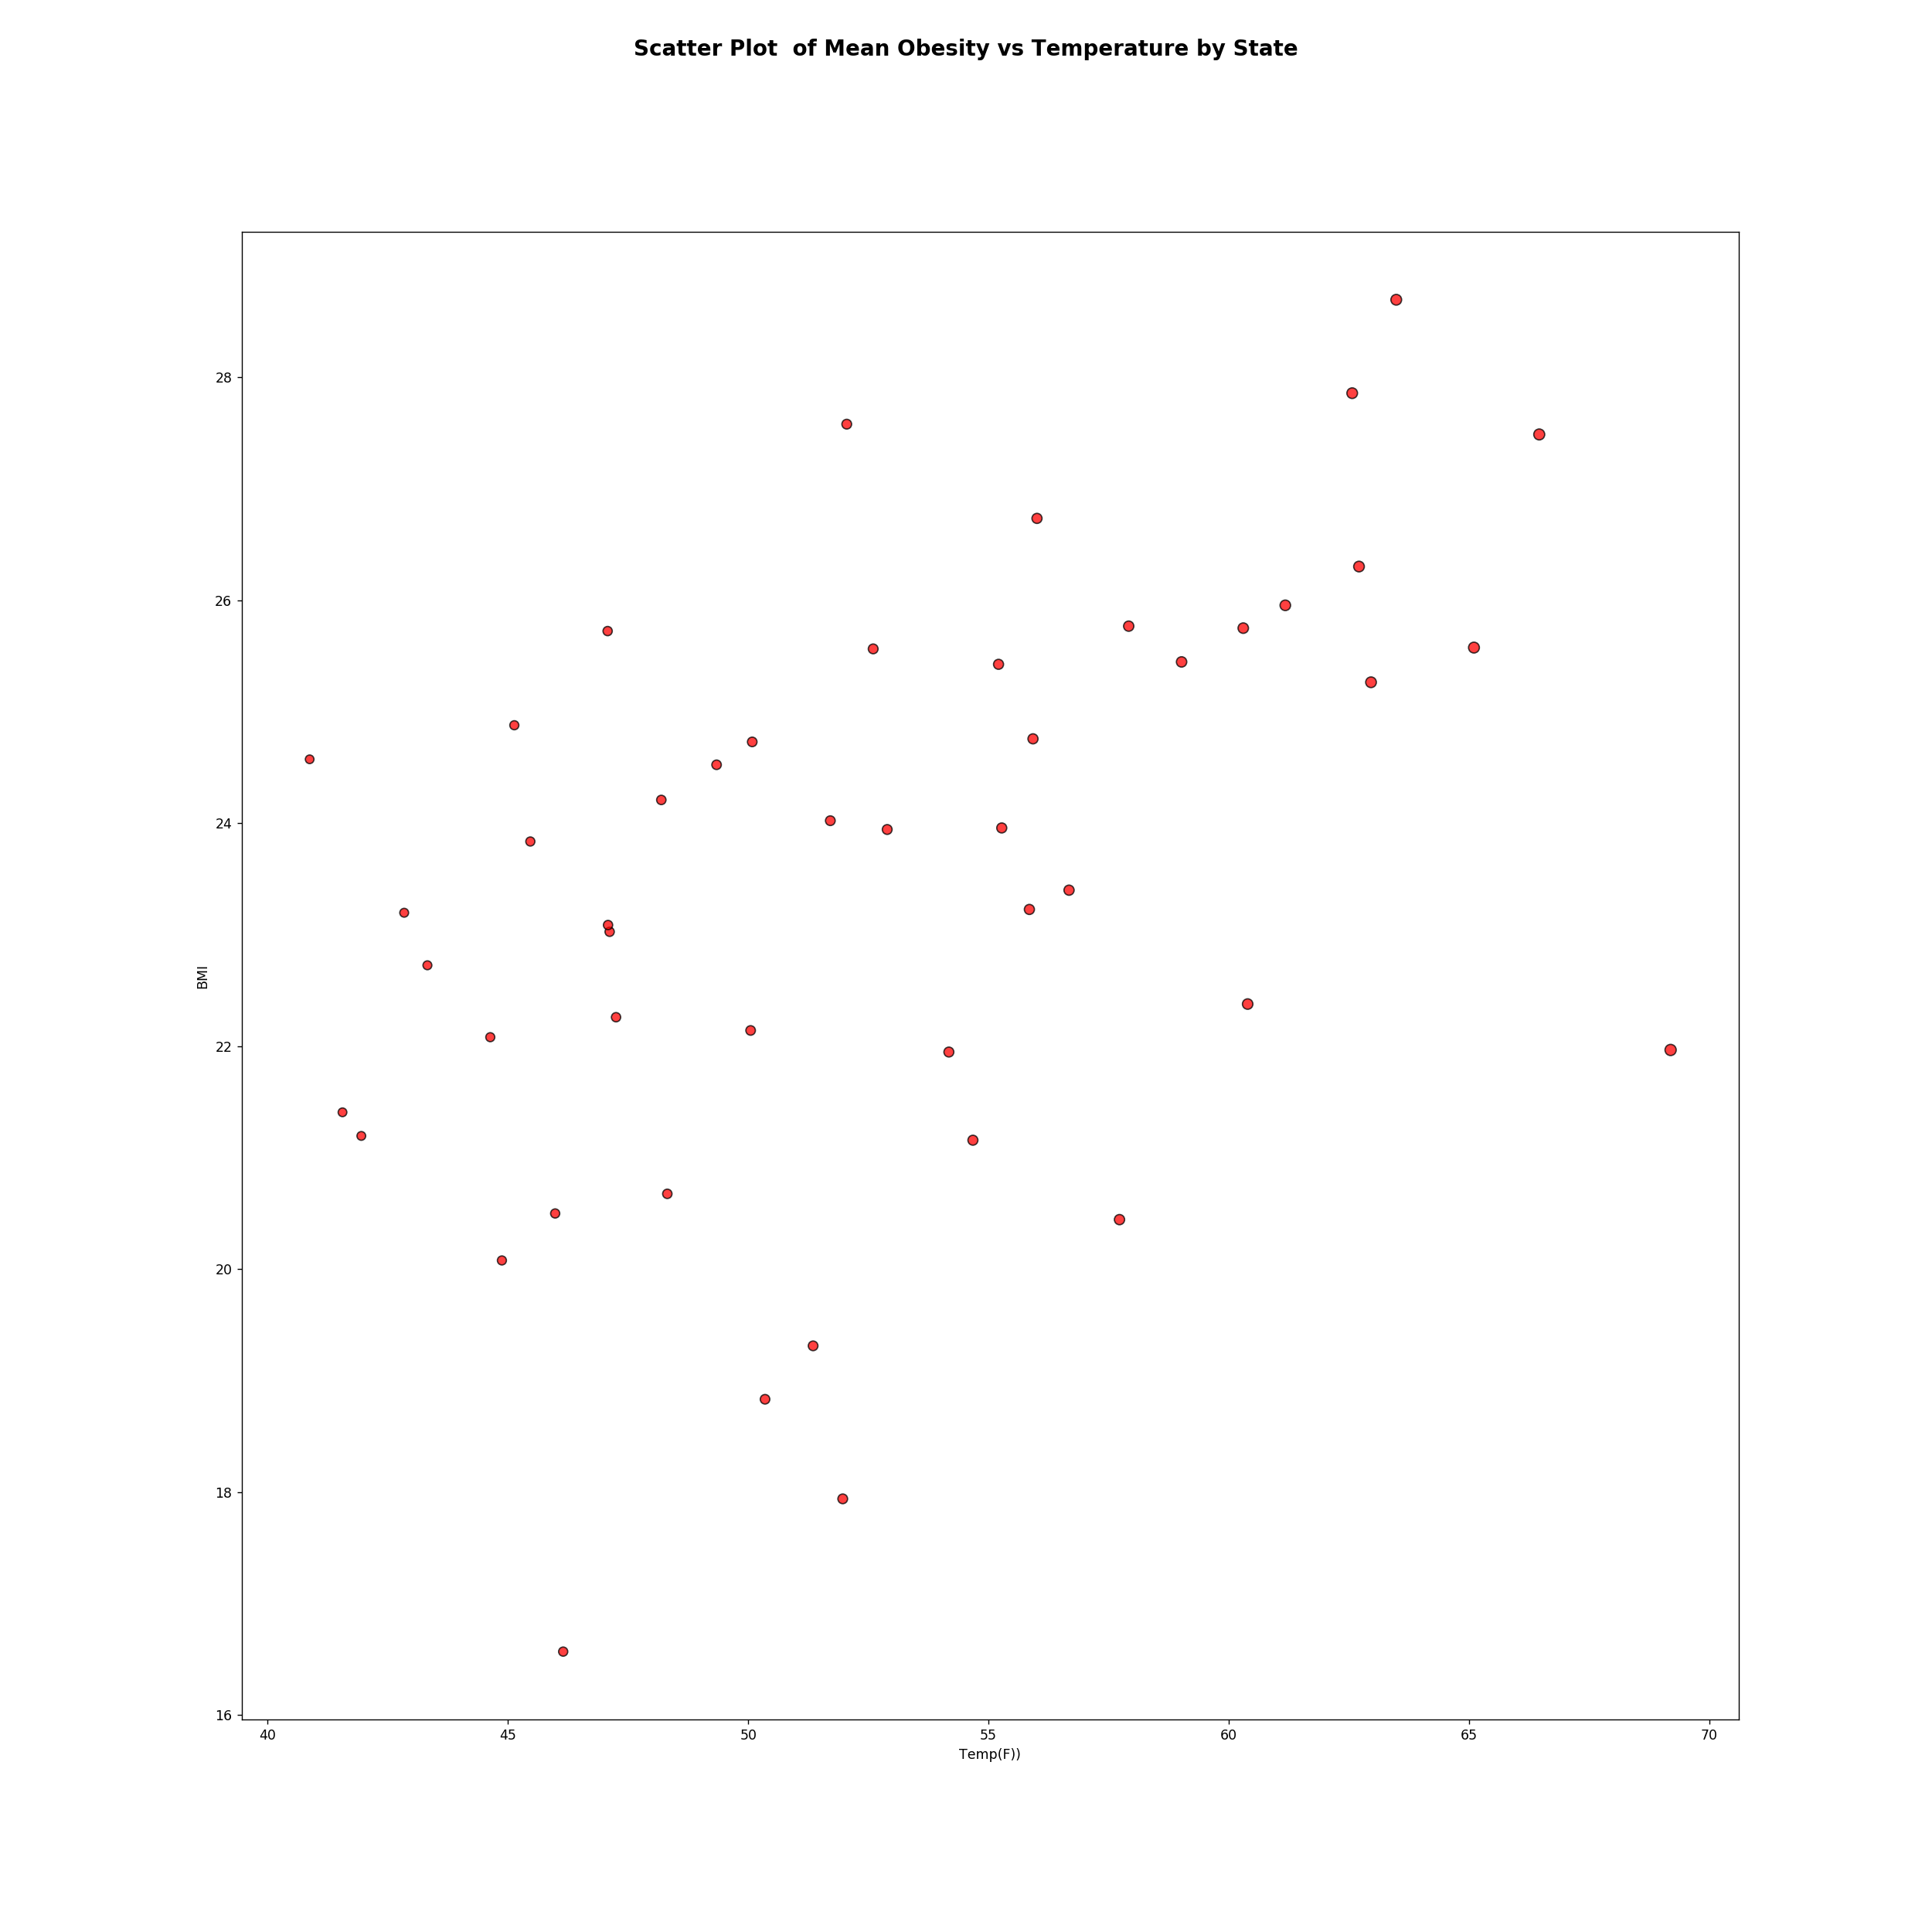

In [86]:
# Create a random array of data that we will use for our y values
datay = mergedf["Obesity"]
datay
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(x_axis, datay, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
#plt.ylim(30, 85)
#plt.xlim(30, 100)
plt.show()
fig.suptitle("Scatter Plot  of Mean Obesity vs Temperature by State", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp(F))")
ax.set_ylabel("BMI")
#Save Figure
plt.savefig('Scatter Plot of Mean Obesity vs Temperature by state.png')

In [62]:
# Set line
(slope, intercept, _, _, _) = linregress(x_axis, datay)
fit = slope * x_axis + intercept

<IPython.core.display.Javascript object>


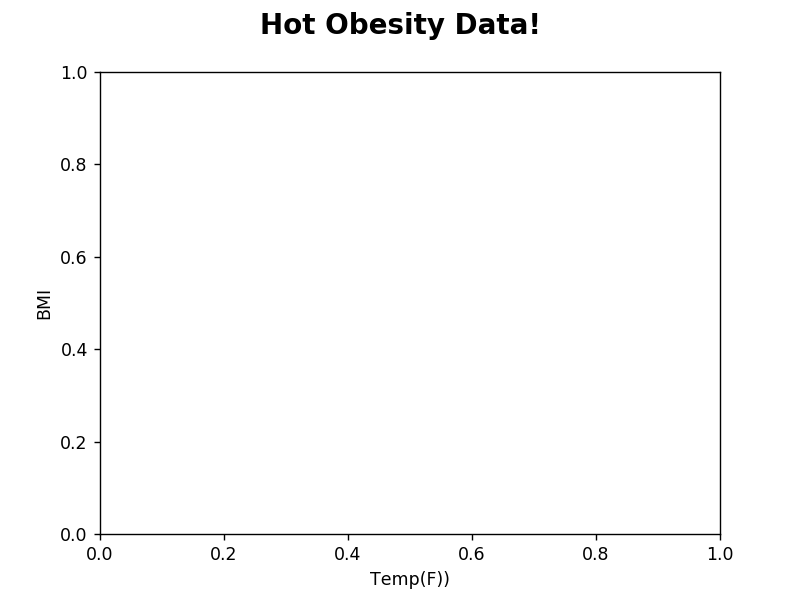

<IPython.core.display.Javascript object>


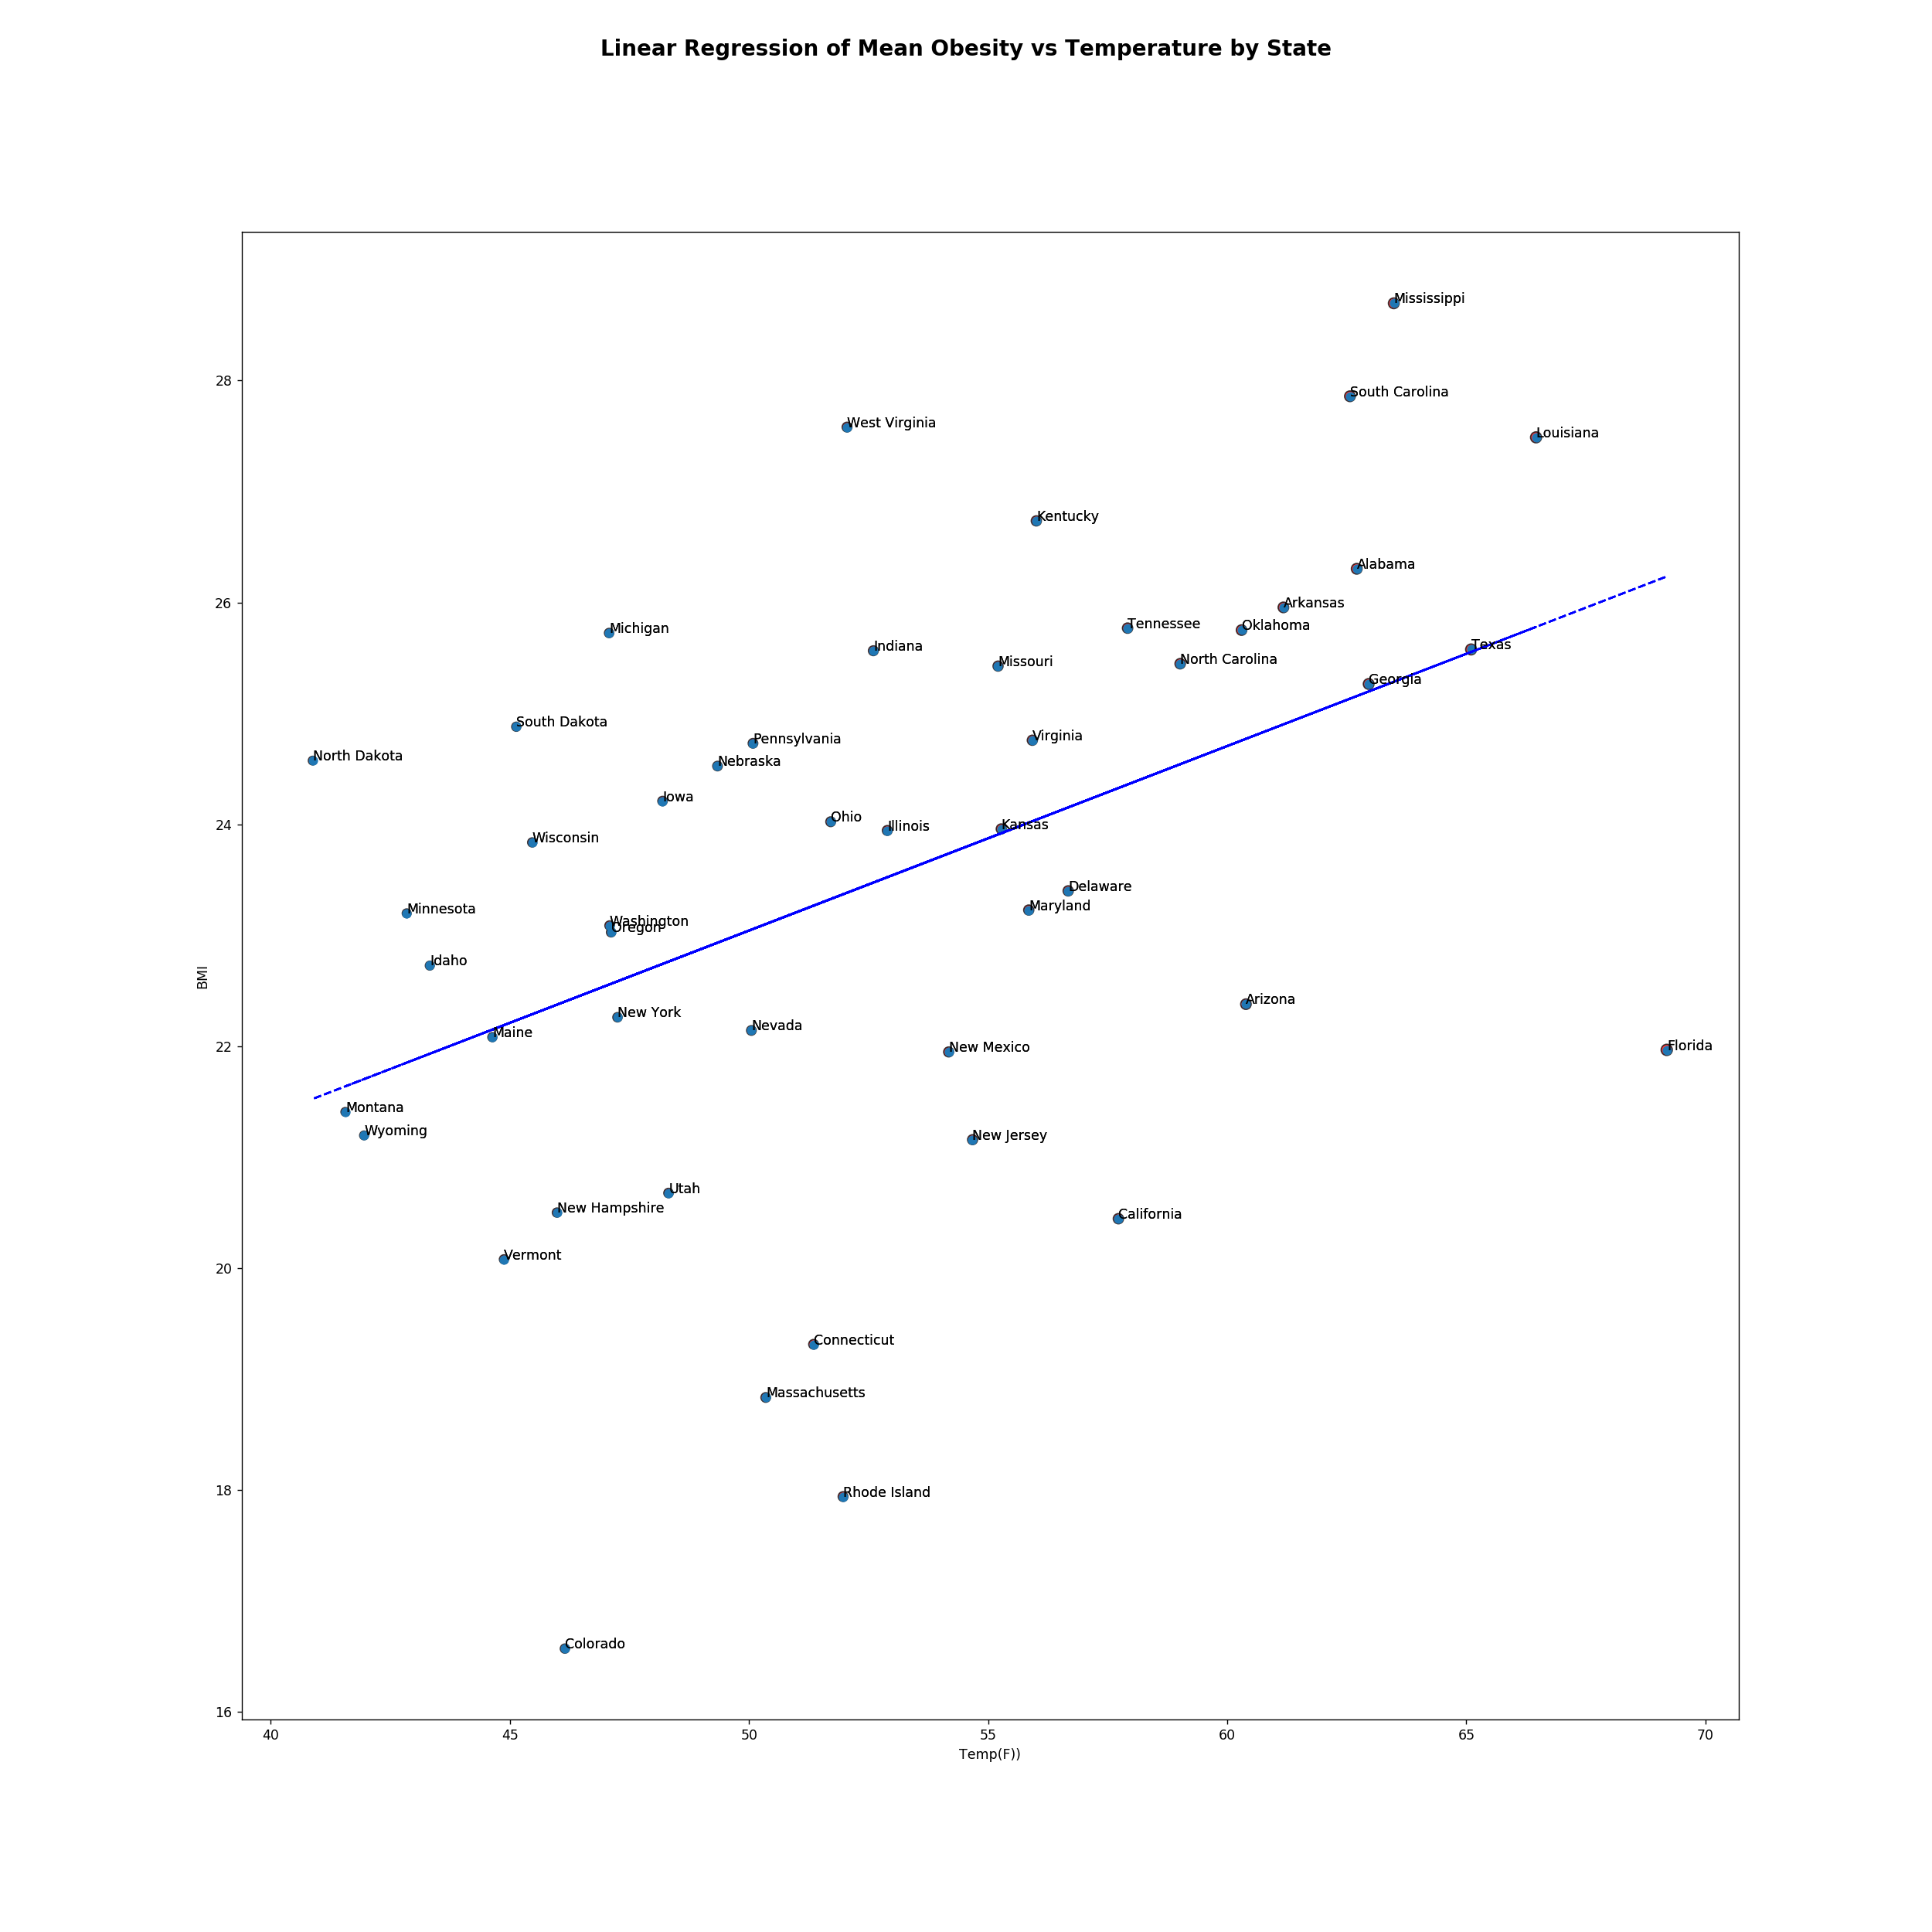

In [75]:
# Create a random array of data that we will use for our y values
datay = mergedf["Obesity"]
datay
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value

fig, ax = plt.subplots()

fig.suptitle("Hot Obesity Data!", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp(F))")
ax.set_ylabel("BMI")
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(x_axis, datay, linewidth=0, marker='o')

ax.scatter(x_axis, datay, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)
ax.plot(x_axis, fit, 'b--')
labeld=mergedf.index
for i, txt in enumerate(labeld):
    ax.annotate(txt,(x_axis[i], datay[i]))

fig.suptitle("Linear Regression of Mean Obesity vs Temperature by State", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp(F))")
ax.set_ylabel("BMI")

plt.show()
#Save Figure
plt.savefig('Linear Regression of Mean Obesity vs Temperature by state.png')

In [6]:
risk_corr_df = obesity_data.corr()

In [7]:
risk_corr_df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'Strata_ID_Number',
       'No_Exercise', 'CI_Min_No_Exercise', 'CI_Max_No_Exercise',
       'Few_Fruit_Veg', 'CI_Min_Fruit_Veg', 'CI_Max_Fruit_Veg', 'Obesity',
       'CI_Min_Obesity', 'CI_Max_Obesity', 'High_Blood_Pres',
       'CI_Min_High_Blood_Pres', 'CI_Max_High_Blood_Pres', 'Smoker',
       'CI_Min_Smoker', 'CI_Max_Smoker', 'Diabetes', 'CI_Min_Diabetes',
       'CI_Max_Diabetes', 'Uninsured', 'Elderly_Medicare', 'Disabled_Medicare',
       'Prim_Care_Phys_Rate', 'Dentist_Rate', 'Community_Health_Center_Ind',
       'HPSA_Ind'],
      dtype='object')

In [8]:
# Create DF with only 'CHSI_State_Name', 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker'
sub_riskfactors_df = obesity_data[["CHSI_State_Abbr", 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker']]
sub_riskfactors_df.head()

,CHSI_State_Abbr,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
0,AL,27.8,78.6,24.5,26.6
1,AL,27.2,76.2,23.6,24.6
2,AL,-1111.1,-1111.1,25.6,17.7
3,AL,-1111.1,86.6,-1111.1,-1111.1
4,AL,33.5,74.6,24.2,23.6


In [9]:
sub_riskfactors_df2 = sub_riskfactors_df[(sub_riskfactors_df["Obesity"] > 0)& (sub_riskfactors_df["No_Exercise"] > 0) & (sub_riskfactors_df["Few_Fruit_Veg"] > 0)& (sub_riskfactors_df["Smoker"] > 0)]
sub_riskfactors_df2.head()

,CHSI_State_Abbr,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
0,AL,27.8,78.6,24.5,26.6
1,AL,27.2,76.2,23.6,24.6
4,AL,33.5,74.6,24.2,23.6
7,AL,29.2,81.9,27.0,25.5
10,AL,30.3,82.8,31.2,30.0


In [10]:
#Group by State to identify count of obese counties by state
riskfactor_by_state = sub_riskfactors_df2.groupby("CHSI_State_Abbr").mean()
riskfactor_by_state.head()

,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
CHSI_State_Abbr,,,,
AL,29.932258,79.396774,26.303226,25.932258
AR,31.357143,80.028571,25.955357,26.973214
AZ,25.357143,73.364286,22.378571,19.978571
CA,21.489655,72.206897,20.444828,15.841379
CO,19.147826,76.408696,16.569565,20.613043


In [11]:
# Sort it highest to lowest
riskfactor_by_state_ascend = riskfactor_by_state.sort_values(['Obesity'], ascending=False)

<IPython.core.display.Javascript object>


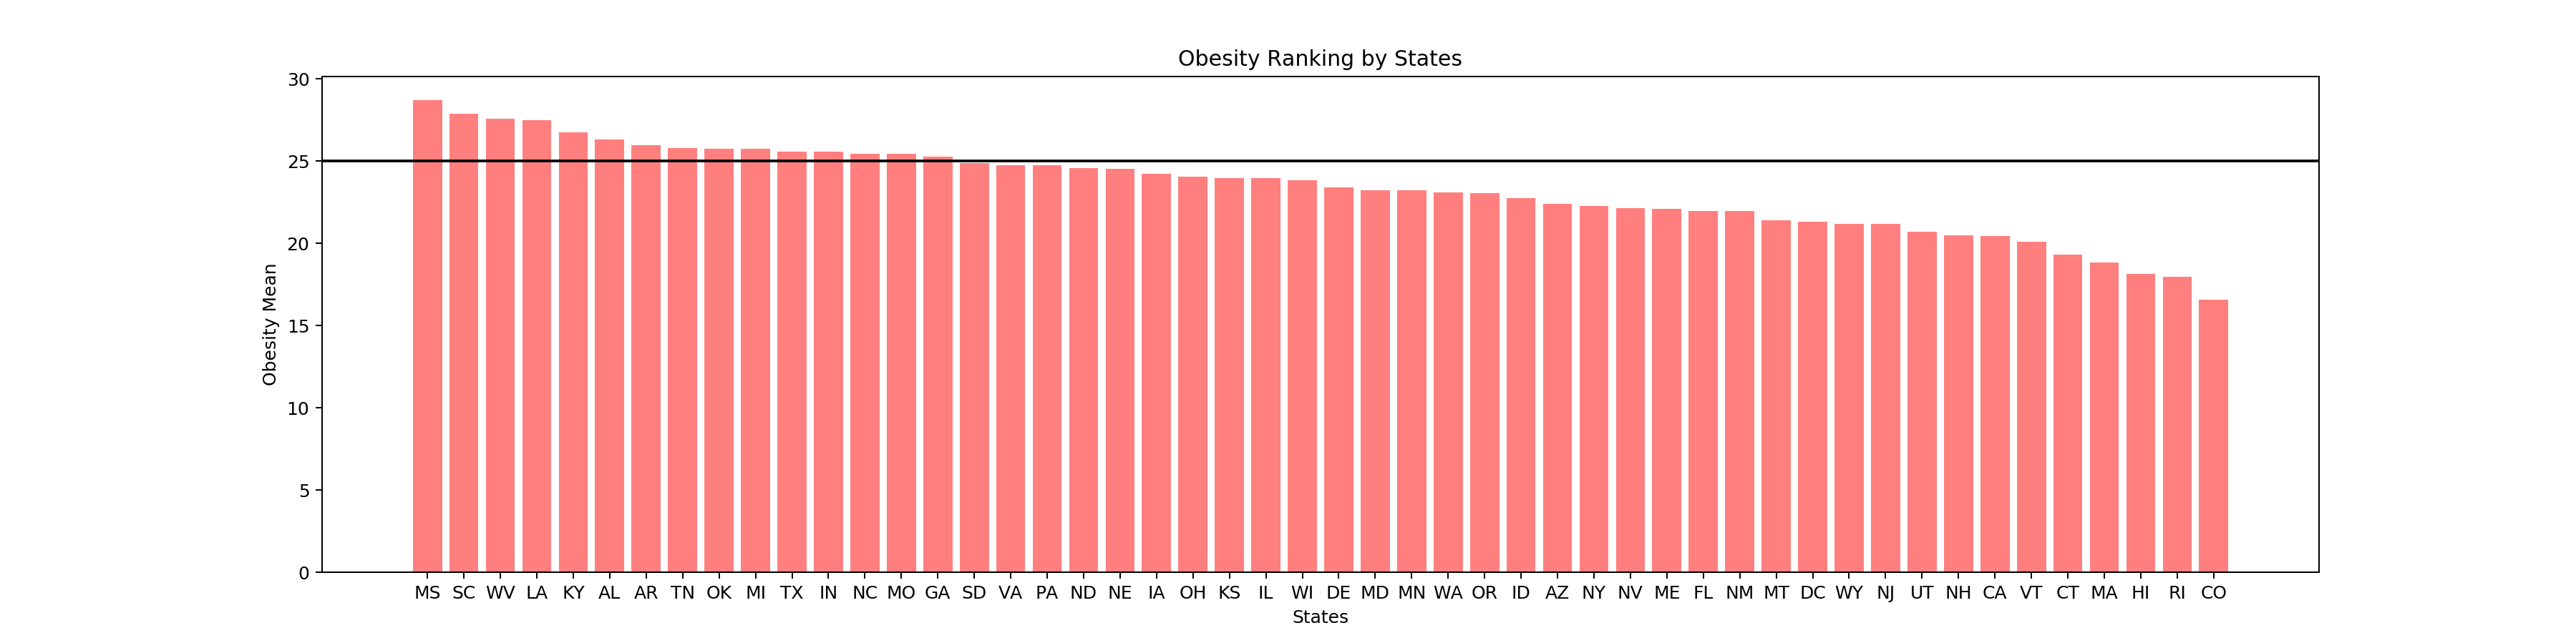

In [12]:
#Create Bar graph
state_list = riskfactor_by_state_ascend.index
obesity_y = riskfactor_by_state_ascend["Obesity"]
plt.figure(figsize=(20,5))
plt.bar(state_list, obesity_y, color='r', alpha=0.5, align="center")
plt.title("Obesity Ranking by States")
plt.xlabel("States")
plt.ylabel("Obesity Mean")
plt.axhline(y=25, color = 'black')



In [13]:
#Save Figure
plt.savefig('mean_obsity_by_state.png')

<IPython.core.display.Javascript object>


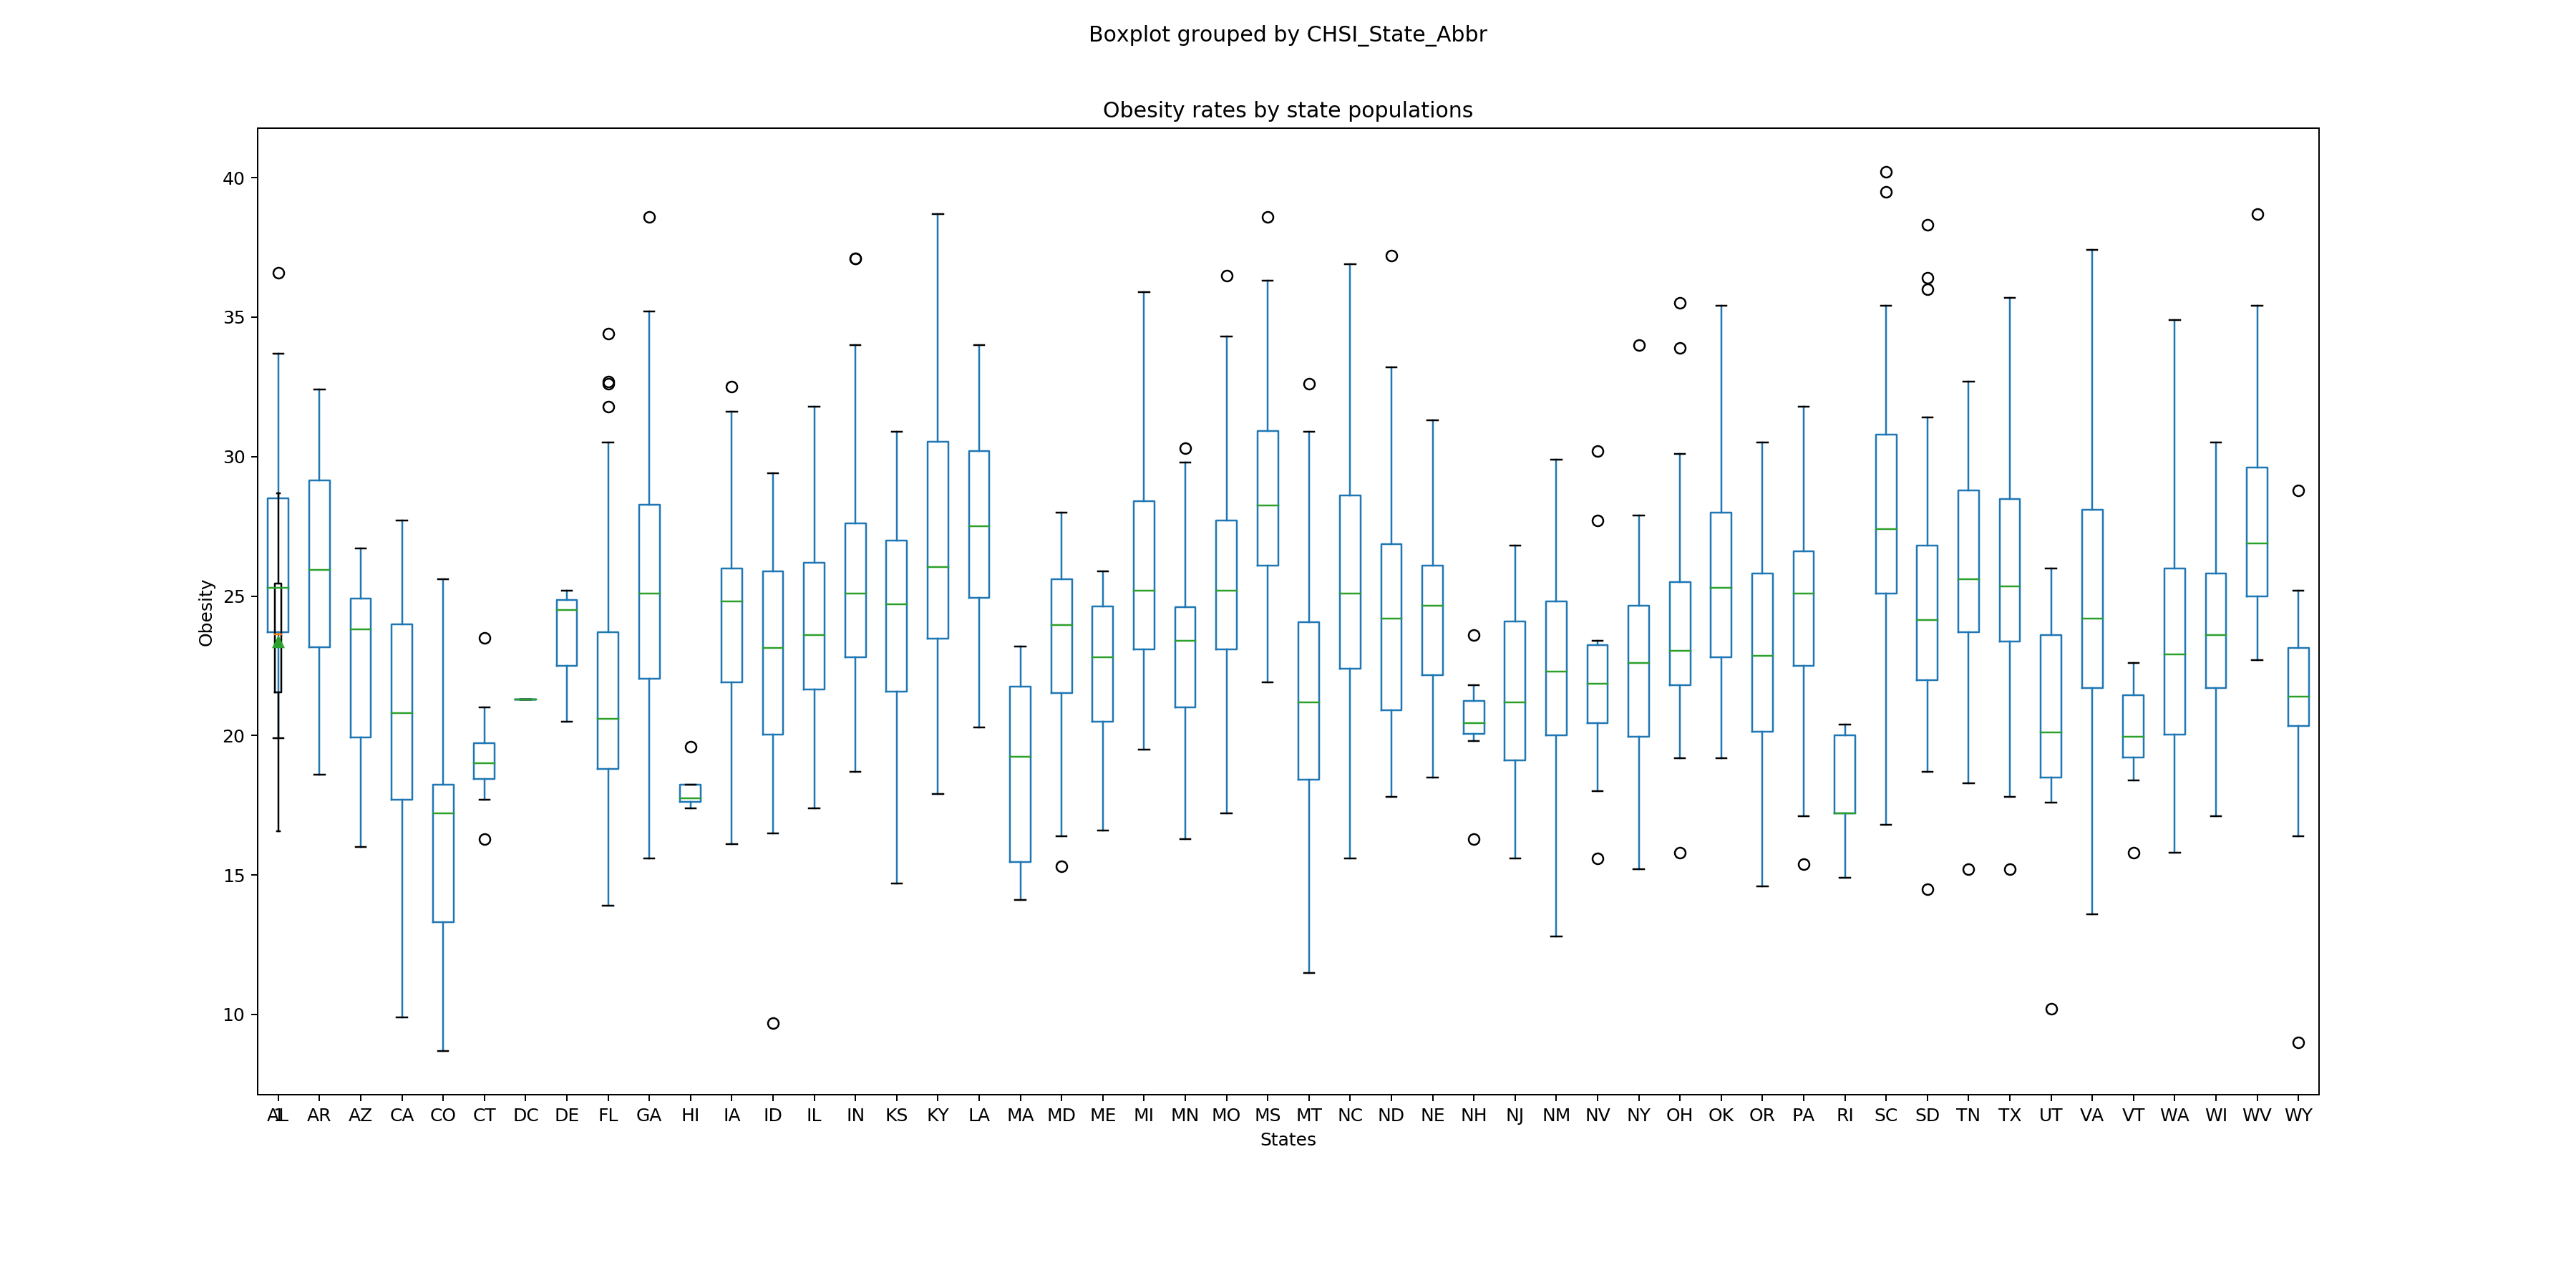

Text(0, 0.5, 'Obesity')

In [14]:
# Create a boxplot to compare means
sub_riskfactors_df2.boxplot("Obesity", by="CHSI_State_Abbr", figsize=(20, 10))
plt.title("Obesity rates by state populations")
plt.xlabel("States")
plt.ylabel("Obesity")

In [15]:
plt.savefig('Statepop_BMI_boxplot.png')

In [16]:
group1 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "AL"]["Obesity"]
group2 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "AZ"]["Obesity"]
group3 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == 'AR']["Obesity"]
group4 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "CO"]["Obesity"]
group5 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == 'CT']["Obesity"]
group6 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "DE"]["Obesity"]
group7 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "DC"]["Obesity"]
group8 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "FL"]["Obesity"]
group9 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "GA"]["Obesity"]
group10 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="HI"]["Obesity"]
group11 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="ID"]["Obesity"]
group12 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="IL"]["Obesity"]
group13 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="IN"]["Obesity"]
group14 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="IA"]["Obesity"]
group15 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="KS"]["Obesity"]
group16 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="KY"]["Obesity"]
group17 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="LA"]["Obesity"]
group18 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="ME"]["Obesity"]
group19 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="MD"]["Obesity"]
group20 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="MA"]["Obesity"]
group21 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "MI"]["Obesity"]
group22 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == 'MN']["Obesity"]
group23 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == 'MS']["Obesity"]
group24 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "MO"]["Obesity"]
group25 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == 'MT']["Obesity"]
group26 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "NE"]["Obesity"]
group27 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "NV"]["Obesity"]
group28 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "NH"]["Obesity"]
group29 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "NJ"]["Obesity"]
group30 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="NJ"]["Obesity"]
group31 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="NM"]["Obesity"]
group32 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="NY"]["Obesity"]
group33 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="NC"]["Obesity"]
group34 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="ND"]["Obesity"]
group35 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="OH"]["Obesity"]
group36 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="OK"]["Obesity"]
group37 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="OR"]["Obesity"]
group38 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="PA"]["Obesity"]
group39 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="RI"]["Obesity"]
group40 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] =="SC"]["Obesity"]
group41 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "SD"]["Obesity"]
group42 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "TN"]["Obesity"]
group43 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "TX"]["Obesity"]
group44 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "UT"]["Obesity"]
group45 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "VT"]["Obesity"]
group46 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "VA"]["Obesity"]
group47 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "WA"]["Obesity"]
group48 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "WV"]["Obesity"]
group49 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "WI"]["Obesity"]
group50 = sub_riskfactors_df2[sub_riskfactors_df2["CHSI_State_Abbr"] == "WY"]["Obesity"]

In [17]:
#Perform ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12,
            group13,group14,group15,group16,group17,group18,group19,group20,group21,group22,group23,group24,group25,
            group26,group27,group28,group29,group30,group31,group32,group33,group34,group35,group36,group37,group38,
            group39,group40,group41,group42,group43,group44,group45,group46,group47,group48,group49,group50)

F_onewayResult(statistic=11.554393289970982, pvalue=2.6714108531690735e-75)

In [18]:
riskfactor_by_state_corr = sub_riskfactors_df2.groupby("CHSI_State_Abbr").corr()
riskfactor_by_state_corr.head(50)

No_Exercise  Few_Fruit_Veg   Obesity    Smoker
CHSI_State_Abbr                                                              
AL              No_Exercise       1.000000       0.426874  0.520460  0.348888
                Few_Fruit_Veg     0.426874       1.000000  0.488216  0.194709
                Obesity           0.520460       0.488216  1.000000  0.105343
                Smoker            0.348888       0.194709  0.105343  1.000000
AR              No_Exercise       1.000000       0.240261  0.567191  0.363154
                Few_Fruit_Veg     0.240261       1.000000  0.285452  0.410350
                Obesity           0.567191       0.285452  1.000000  0.355758
                Smoker            0.363154       0.410350  0.355758  1.000000
AZ              No_Exercise       1.000000       0.065089  0.358771  0.221294
                Few_Fruit_Veg     0.065089       1.000000  0.296051  0.244104
                Obesity           0.358771       0.296051  1.000000  0.071622
                Smoker            0.221294       0.244104  0.071622  1.000000
CA              No_Exercise       1.000000       0.430106  0.617945  0.414155
                Few_Fruit_Veg     0.430106       1.000000  0.418918  0.305572
                Obesity           0.617945       0.418918  1.000000  0.511362
                Smoker            0.414155       0.305572  0.511362  1.000000
CO              No_Exercise       1.000000       0.424021  0.806298  0.566301
                Few_Fruit_Veg     0.424021       1.000000  0.605802  0.297894
                Obesity           0.806298       0.605802  1.000000  0.554567
                Smoker            0.566301       0.297894  0.554567  1.000000
CT              No_Exercise       1.000000      -0.455357  0.718794  0.604549
                Few_Fruit_Veg    -0.455357       1.000000  0.103019  0.108582
                Obesity           0.718794       0.103019  1.000000  0.916435
                Smoker            0.604549       0.108582  0.916435  1.000000
DC              No_Exercise            NaN            NaN       NaN       NaN
                Few_Fruit_Veg          NaN            NaN       NaN       NaN
                Obesity                NaN            NaN       NaN       NaN
                Smoker                 NaN            NaN       NaN       NaN
DE              No_Exercise       1.000000       0.601932  0.945129  0.987165
                Few_Fruit_Veg     0.601932       1.000000  0.829787  0.721737
                Obesity           0.945129       0.829787  1.000000  0.985173
                Smoker            0.987165       0.721737  0.985173  1.000000
FL              No_Exercise       1.000000       0.414817  0.608196  0.286750
                Few_Fruit_Veg     0.414817       1.000000  0.624538  0.123475
                Obesity           0.608196       0.624538  1.000000  0.288031
                Smoker            0.286750       0.123475  0.288031  1.000000
GA              No_Exercise       1.000000       0.401973  0.565144  0.405931
                Few_Fruit_Veg     0.401973       1.000000  0.161163  0.374797
                Obesity           0.565144       0.161163  1.000000  0.289719
                Smoker            0.405931       0.374797  0.289719  1.000000
HI              No_Exercise       1.000000      -0.724579  0.671216  0.139927
                Few_Fruit_Veg    -0.724579       1.000000 -0.270249 -0.594185
                Obesity           0.671216      -0.270249  1.000000  0.329777
                Smoker            0.139927      -0.594185  0.329777  1.000000
IA              No_Exercise       1.000000       0.230221  0.502274  0.447044
                Few_Fruit_Veg     0.230221       1.000000  0.018605  0.215517
                Obesity           0.502274       0.018605  1.000000  0.310729
                Smoker            0.447044       0.215517  0.310729  1.000000
ID              No_Exercise       1.000000       0.519894  0.703238  0.450799
                Few_Fruit_Veg     0.519894       1.00

In [19]:
factors_state = riskfactor_by_state_corr[(riskfactor_by_state_corr["Obesity"] > 0.7)& (riskfactor_by_state_corr["No_Exercise"] > 0.7) & (riskfactor_by_state_corr["Few_Fruit_Veg"] > 0.7)& (riskfactor_by_state_corr["Smoker"] > 0.7)]
factors_state.head(50)

No_Exercise  Few_Fruit_Veg   Obesity    Smoker
CHSI_State_Abbr                                                              
DE              Obesity           0.945129       0.829787  1.000000  0.985173
                Smoker            0.987165       0.721737  0.985173  1.000000
RI              No_Exercise       1.000000       0.930912  0.885584  0.719574
                Few_Fruit_Veg     0.930912       1.000000  0.948490  0.789195
VT              No_Exercise       1.000000       0.806939  0.809234  0.847791

In [20]:
# Outliers
arr = sub_riskfactors_df2["Obesity"]

In [21]:
# Find median Obesity
mid = arr.median()
mid

24.4

In [22]:
# Use numpy to create quartiles
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr,75)

In [23]:
iqr = (q3 - q1)
print("interquartile range:", iqr)

interquartile range: 5.700000000000003


In [24]:
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)

In [25]:
arr[arr <= lower_boundary]

204      9.9
221     10.5
248     10.9
260     11.4
265     11.6
276      8.7
277     12.8
302      9.1
555      9.7
1611    11.5
1808    12.8
2796    10.2
3137     9.0
Name: Obesity, dtype: float64

In [26]:
arr[arr >= upper_boundary]

23      36.6
401     38.6
695     37.1
717     37.1
1045    35.8
1065    38.7
1303    35.9
1413    35.7
1445    38.6
1465    36.3
1474    35.7
1492    36.5
1933    36.9
2027    37.2
2318    40.2
2358    39.5
2374    38.3
2419    36.4
2425    36.0
2523    35.7
2939    37.4
3013    38.7
Name: Obesity, dtype: float64

In [39]:
lower_outliers = sub_riskfactors_df2.loc[[204,221,248,260,265,276,277,30,555,1611,1808,2796,3137],["CHSI_State_Abbr",'No_Exercise','Few_Fruit_Veg','Obesity','Smoker']]
lower_outliers

/Users/rebeccaatkins/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,CHSI_State_Abbr,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
204,CA,8.3,66.0,9.9,12.0
221,CA,21.8,69.3,10.5,17.8
248,CO,10.3,69.3,10.9,14.3
260,CO,11.4,77.7,11.4,8.9
265,CO,8.7,70.2,11.6,20.1
276,CO,12.1,67.8,8.7,20.9
277,CO,13.6,75.8,12.8,20.7
30,NaN,NaN,NaN,NaN,NaN
555,ID,11.2,69.3,9.7,13.9
1611,MT,13.5,77.3,11.5,14.9


In [28]:
lower_outliers_county = sub_riskfactors_df2.loc[[204,221,248,260,265,276,277,302,555,1611,1808,2796,3137],["CHSI_State_Abbr", 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker']]
lower_outliers

,CHSI_State_Abbr,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
204,CA,8.3,66.0,9.9,12.0
221,CA,21.8,69.3,10.5,17.8
248,CO,10.3,69.3,10.9,14.3
260,CO,11.4,77.7,11.4,8.9
265,CO,8.7,70.2,11.6,20.1
276,CO,12.1,67.8,8.7,20.9
277,CO,13.6,75.8,12.8,20.7
30,NaN,NaN,NaN,NaN,NaN
555,ID,11.2,69.3,9.7,13.9
1611,MT,13.5,77.3,11.5,14.9


In [29]:
# Sort it lowest to highest
lower_outliers_by_state_ascend = lower_outliers.sort_values(['Obesity'], ascending=True)
lower_outliers_by_state_ascend

,CHSI_State_Abbr,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
276,CO,12.1,67.8,8.7,20.9
3137,WY,9.6,68.8,9.0,13.7
555,ID,11.2,69.3,9.7,13.9
204,CA,8.3,66.0,9.9,12.0
2796,UT,12.9,73.9,10.2,8.7
221,CA,21.8,69.3,10.5,17.8
248,CO,10.3,69.3,10.9,14.3
260,CO,11.4,77.7,11.4,8.9
1611,MT,13.5,77.3,11.5,14.9
265,CO,8.7,70.2,11.6,20.1


In [30]:
higher_outliers = sub_riskfactors_df2.loc[[23,401,695,717,1045,1065,1303,1413,1445,1465,1474,1492,1933,2027,2318,2358,
                                           2374,2419,2425,2523,2939,3013],["CHSI_State_Abbr", 'No_Exercise','Few_Fruit_Veg','Obesity','Smoker']]
higher_outliers

,CHSI_State_Abbr,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
23,AL,31.5,85.9,36.6,20.4
401,GA,40.8,77.3,38.6,21.4
695,IN,31.7,82.8,37.1,15.4
717,IN,35.5,82.0,37.1,24.6
1045,KY,43.9,87.6,35.8,41.6
1065,KY,41.0,83.1,38.7,27.6
1303,MI,26.6,77.8,35.9,27.5
1413,MS,36.7,78.4,35.7,27.1
1445,MS,31.3,80.6,38.6,31.2
1465,MS,35.1,84.8,36.3,25.2


In [31]:
# Sort it highest to lowest
higher_outliers_by_state_descend = higher_outliers.sort_values(['Obesity'], ascending=False)
higher_outliers_by_state_descend

,CHSI_State_Abbr,No_Exercise,Few_Fruit_Veg,Obesity,Smoker
2318,SC,31.6,82.1,40.2,23.8
2358,SC,28.9,73.6,39.5,24.0
3013,WV,34.3,82.9,38.7,31.9
1065,KY,41.0,83.1,38.7,27.6
1445,MS,31.3,80.6,38.6,31.2
401,GA,40.8,77.3,38.6,21.4
2374,SD,34.2,82.4,38.3,28.5
2939,VA,31.8,80.2,37.4,26.0
2027,ND,29.3,81.0,37.2,35.6
695,IN,31.7,82.8,37.1,15.4


In [32]:
# Outliers by state
arr2 = riskfactor_by_state_ascend["Obesity"]
mid2 = arr2.median()
mid2

23.618367346938776

In [33]:
# Use numpy to create quartiles for state outliers
q1_2 = np.percentile(arr2, 25)
q3_2 = np.percentile(arr2,75)

In [34]:
iqr_2 = (q3_2 - q1_2)
print("interquartile range:", iqr_2)

interquartile range: 3.899716235534541


In [35]:
lower_boundary_state = q1_2 - (1.5 * iqr_2)
upper_boundary_state = q3_2 + (1.5 * iqr_2)

In [36]:
arr2[arr2 <= lower_boundary_state]

Series([], Name: Obesity, dtype: float64)

In [37]:
arr2[arr2 >= upper_boundary_state]

Series([], Name: Obesity, dtype: float64)

In [38]:
# Create box plot
plt.boxplot(arr2, showmeans=True)
plt.grid()
plt.show()